In [1]:
import numpy as np
from numpy import genfromtxt
import GPy
#import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,5)
GPy.plotting.change_plotting_library("matplotlib")

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

In [5]:
#loading the data.
path = r"C:\Users\mikep\Desktop\project\data\final"

Xtrain = genfromtxt(path+"\Xtrain.csv", delimiter=',', skip_header=1)
Xtest = genfromtxt(path+"\Xtest.csv", delimiter=',', skip_header=1)

Ytrain = genfromtxt(path+"\Ytrain.csv", delimiter=',', skip_header=1)
Ytest = genfromtxt(path+"\Ytest.csv", delimiter=',', skip_header=1)

print(Xtrain)

[[ 876.375 8025.   ]
 [ 889.125 7245.   ]
 [ 901.875 8415.   ]
 [ 914.625 6465.   ]
 [ 927.375 3735.   ]
 [ 940.125 4125.   ]
 [ 952.875 2175.   ]
 [ 965.625 5295.   ]
 [ 978.375 5685.   ]
 [ 991.125 2955.   ]
 [1003.875 6075.   ]
 [1016.625 4515.   ]
 [1029.375 6855.   ]
 [1042.125 2565.   ]
 [1054.875 1785.   ]
 [1067.625 8805.   ]
 [1080.375 4905.   ]
 [1093.125 7635.   ]
 [1105.875 3345.   ]
 [1118.625 1395.   ]]


In [6]:
#further preprocessing
Ytrain = np.array([Ytrain]).T
Ytest = np.array([Ytest]).T
print(Ytrain)

[[ 68.77149171]
 [ 49.41187269]
 [ 20.27608385]
 [-21.79548554]
 [-69.54711423]
 [ 79.75486465]
 [-54.7220702 ]
 [-84.40203453]
 [-90.47079843]
 [-88.67659358]
 [  3.37459845]
 [102.1569626 ]
 [ 37.54366685]
 [ 24.01723344]
 [ 30.14611754]
 [ 26.60744689]
 [-79.73107694]
 [100.8856516 ]
 [ 31.47176299]
 [-85.0725798 ]]


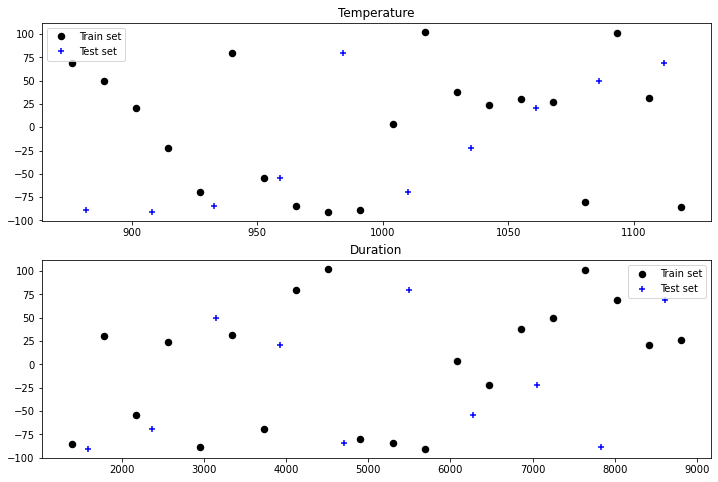

In [7]:
#visualizing data

#xlim = (0,100); ylim = (0,50)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#ax1.set_xlim(xlim)
ax1.set_title('Temperature')
ax1.plot(Xtrain[:,0], Ytrain,'ko',mew=1.5,label='Train set')
ax1.plot(Xtest[:,0], Ytest,'b+',mew=1.5,label='Test set')
ax1.legend()+
ax2 = fig.add_subplot(212)
#ax2.set_xlim(xlim)
ax2.set_title('Duration')
ax2.plot(Xtrain[:,1], Ytrain,'ko',mew=1.5, label='Train set')
ax2.plot(Xtest[:,1], Ytest,'b+',mew=1.5,label='Test set')
ax2.legend()

{'covariance': [<matplotlib.contour.QuadContourSet at 0x1cd0a12bbe0>]}

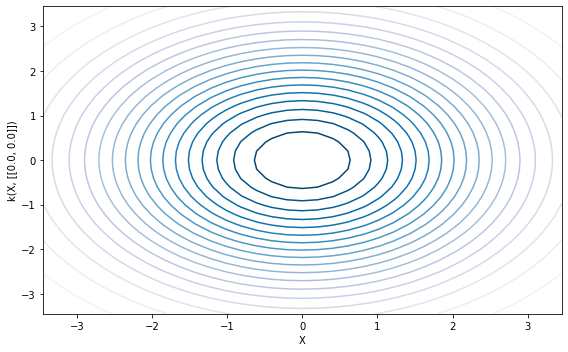

In [7]:
# SE - ARD Kernel

k = GPy.kern.RBF(input_dim=2, lengthscale=2, ARD=True)
k.plot(cmap="PuBu")

{'covariance': [<matplotlib.contour.QuadContourSet at 0x1cd0a58e370>]}

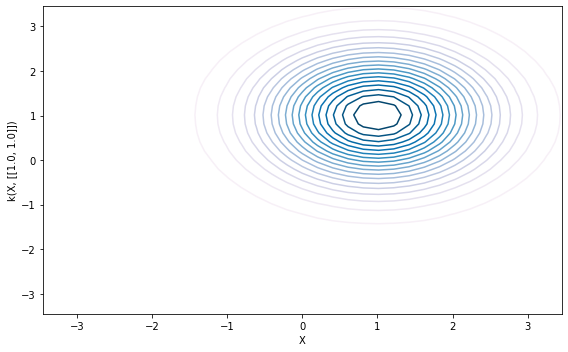

In [8]:
# Additive Kernel

k3 = GPy.kern.RBF(1, active_dims=[0])
k4 = GPy.kern.RBF(1, active_dims=[1])

k_prod = k3*k4
k_prod.plot(cmap="PuBu")

A change in the parameters of the additive kernel translates into changes in the constituent kernels.

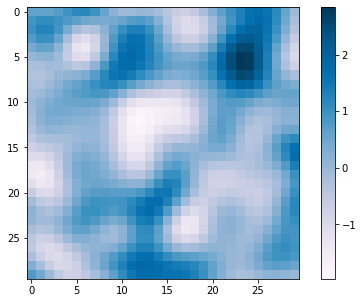

In [9]:
#plotting function for kernel

def plot_sample(k):
    xx, yy = np.mgrid[-10:10:30j, -10:10:30j]
    X = np.vstack((xx.flatten(), yy.flatten())).T
    K = k.K(X)
    s = np.random.multivariate_normal(np.zeros(X.shape[0]), K)
    plt.imshow(s.reshape(*xx.shape), interpolation='nearest', cmap="PuBu")
    plt.colorbar()

plot_sample(k)

In [10]:
# regression models
model = GPy.models.GPRegression(Xtrain, Ytrain, k)
#m_prod = GPy.models.GPRegression(Xtrain, Ytrain, k_prod)

In [11]:
display(model)
print(model.rbf.lengthscale)

  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     2.00000000  |      +ve      |        
  [1]    |                     2.00000000  |      +ve      |        


In [12]:
# optimization
model.optimize(messages=True, max_f_eval=5000)
model.optimize_restarts(num_restarts=50)

Optimization restart 1/50, f = 111.83509134881086
Optimization restart 2/50, f = 111.83509097088077
Optimization restart 3/50, f = 111.83516573868269
Optimization restart 4/50, f = 111.83517574504397
Optimization restart 5/50, f = 111.83511061810069
Optimization restart 6/50, f = 111.83510091832314
Optimization restart 7/50, f = 111.83510254900078
Optimization restart 8/50, f = 111.83511255618212
Optimization restart 9/50, f = 111.83511080580084
Optimization restart 10/50, f = 111.83509098880968
Optimization restart 11/50, f = 111.8350986194859
Optimization restart 12/50, f = 111.8350920344514
Optimization restart 13/50, f = 111.83509099922934
Optimization restart 14/50, f = 111.8351375945178
Optimization restart 15/50, f = 111.83509890767229
Optimization restart 16/50, f = 111.8350950503313
Optimization restart 17/50, f = 111.83515406218473
Optimization restart 18/50, f = 111.83509169968794
Optimization restart 19/50, f = 111.83509113226313
Optimization restart 20/50, f = 111.83510001

In [24]:
display(model)
print(model.rbf.lengthscale)

  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     0.14985321  |      +ve      |        
  [1]    |                     0.35110883  |      +ve      |        


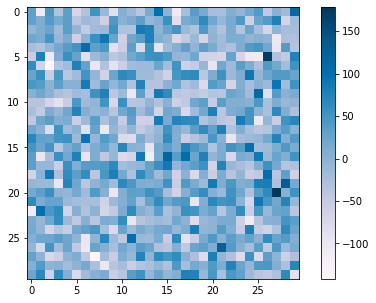

In [31]:
def plot_sample(k):
    xx, yy = np.mgrid[-10:10:30j, -10:10:30j]
    X = np.vstack((xx.flatten(), yy.flatten())).T
    K = k.K(X)
    s = np.random.multivariate_normal(np.zeros(X.shape[0]), K)
    plt.imshow(s.reshape(*xx.shape), interpolation='nearest', cmap="PuBu")
    plt.colorbar()

plot_sample(k)

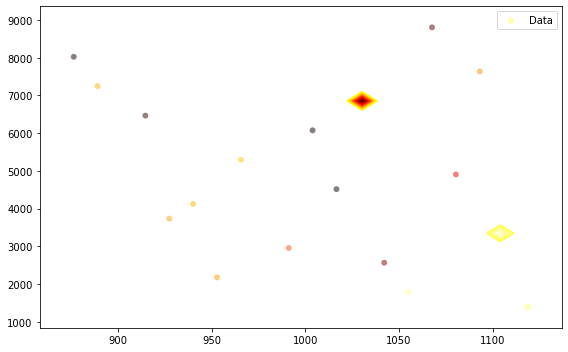

In [14]:
fig = model.plot(plot_density=True)
plt.show()

TypeError: float() argument must be a string or a number, not 'PathCollection'

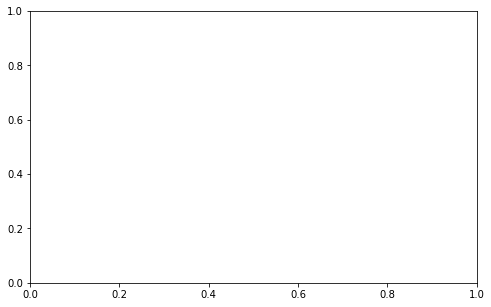

In [15]:
print(fig['dataplot'])
plt.plot(fig['dataplot'])

In [ ]:
plot = fig['gpmean'][0]
plt.contour(plot)

In [ ]:
display(GPy.plotting.show(plot, filename='mean-gp'))

In 2D plots, only the mean is shown.

## Plotting slices
To see the uncertaintly associated with the above predictions, we can plot slices through the surface. this is done by passing the optional `fixed_inputs` argument to the plot function. `fixed_inputs` is a list of tuples containing which of the inputs to fix, and to which value.

To get horixontal slices of the above GP, we'll fix second (index 1) input to -1, 0, and 1.5:

In [ ]:
def plot_2outputs(model ,xlim, ylim):
    fig = plt.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    model.plot(plot_limits=xlim, fixed_inputs=[(1,0)], which_data_rows=slice(0,100),ax=ax1)
    ax1.plot(Xtrain[:, 0], Ytrain, 'rx', mew=1.5)
    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    model.plot(plot_limits=xlim, fixed_inputs=[(1,1)], which_data_rows=slice(100,200),ax=ax2)
    ax2.plot(Xtrain[:,1], Ytrain,'rx', mew=1.5)

In [ ]:
plot_2outputs(model, xlim=(800, 1200), ylim=(1000, 9000))

In [ ]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1,
                        #shared_xaxes=True,
                        #subplot_titles=('slice at -1', 
                                        #'slice at 0', 
                                        #'slice at 1.5', 
                                        #)
                                    )
for i, y in zip(range(3), slices):
    canvas = model.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

The data look strange here: we're seeing slices of the GP, but all the data are displayed, even though they might not be close to the current slice.

To get vertical slices, we simply fixed the other input. We'll turn the display of data off also:

In [ ]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1) 
                        #subplot_titles=('slice at -1', 
                                        #'slice at 0', 
                                        #'slice at 1.5', 
                                        #)
                            #)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0,y)], row=(i+1), plot_data=False)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')

You can find a host of other plotting options in the `m.plot` docstring. `Type m.plot?<enter>` to see. 